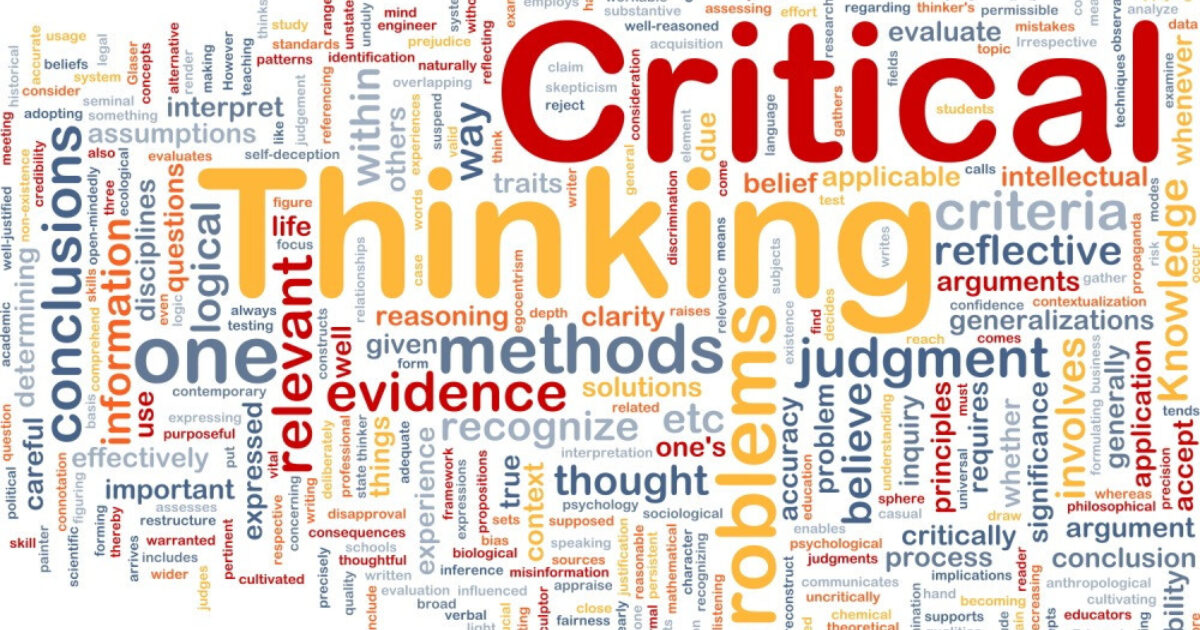

# Critical Thinking Analysis Tool

## **Introduction**
This notebook demonstrates a tool designed to help students develop critical thinking skills by analyzing websites. Critical thinking is the ability to objectively evaluate information, identify biases, assess evidence, and make reasoned judgments. It is a cornerstone of effective learning and decision-making.

## **Why is Critical Thinking Important in Education?**
Critical thinking enables students to:
- Distinguish between fact and opinion.
- Assess the credibility and reliability of information sources.
- Approach problems and arguments with a logical, evidence-based mindset.
In today’s digital age, where information is abundant and often conflicting, critical thinking helps students navigate complex topics and become informed citizens.

## **How This Tool Supports Critical Thinking**
This tool is designed to:
1. **Summarize Content**: Extract and present the main ideas and purpose of a website.
2. **Identify Biases and Gaps**: Highlight potential biases, omissions, or weaknesses in the content.
3. **Propose Discussion Questions**: Suggest questions to stimulate critical reflection and foster meaningful classroom discussions.

By incorporating this tool into educational activities, teachers can provide students with structured opportunities to practice evaluating real-world information critically, making it an effective supplement to traditional learning approaches.


In [1]:
import ollama
import os
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display

In [2]:
class Website:

    def __init__(self, url):
        """
        Create this Website object from the given url using the BeautifulSoup library
        """
        self.url = url
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        self.title = soup.title.string if soup.title else "No title found"
        for irrelevant in soup.body(["script", "style", "img", "input"]):
            irrelevant.decompose()
        self.text = soup.body.get_text(separator="\n", strip=True)

In [3]:
def user_prompt_for(website):
    user_prompt = f"You are analyzing a website titled '{website.title}' for a critical thinking exercise."
    user_prompt += "\n\nTasks:"
    user_prompt += "\n1. Summarize the main topic and purpose of the website."
    user_prompt += "\n2. Highlight key claims or information presented on the website."
    user_prompt += "\n3. Based on the identified claims and information identify some concrete potential biases or gaps in the given content, if any are present."
    user_prompt += "\n4. On the basis of these identified biases, suggest discussion questions for students to evaluate the credibility and usefulness of the website."
    user_prompt += "\n\nWebsite Content:\n"
    user_prompt += website.text
    return user_prompt

In [4]:
def messages_for(website):
    return [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt_for(website)}
    ]

In [5]:
def summarize(url):
    website = Website(url)
    response = ollama.chat(model=MODEL, messages=messages_for(website))
    return response['message']['content']

In [6]:
def validate_response(response):
    required_sections = [
        "# Website Analysis",
        "## Summary of the Main Topic and Purpose",
        "## Key Claims or Information Presented",
        "## Potential Biases or Gaps in the Content",
        "## Discussion Questions",
    ]
    for section in required_sections:
        if section not in response:
            print(f"Warning: Missing section '{section}' in the response.")

In [7]:
def display_summary(url):
    summary = summarize(url)
    validate_response(summary)
    display(Markdown(summary))

In [8]:
system_prompt = """
You are a critical thinking coach helping students analyze a website. 
Your role is to identify the website's purpose, bias, and key information. 
You will summarize the content, highlight biases or gaps, and propose discussion questions.
It is critical that you follow the exact Markdown structure below, even if some sections have no information:

# Website Analysis

## Summary of the Main Topic and Purpose
[Summarize the main topic and purpose of the website here.]

## Key Claims or Information Presented
- [List key claims or information, one per line.]

## Potential Biases or Gaps in the Content
- [Identify biases or gaps, one per line.]

## Discussion Questions
1. [Propose discussion questions related to the content.]
2. [Ensure questions encourage critical thinking about credibility.]
3. [Relate questions to identified biases or gaps.]

If the content is unclear or insufficient, explicitly write "No information available for this section."
"""

In [9]:
MODEL = "llama3.2"

In [10]:
display_summary("https://www.wnd.com/2024/12/watch-big-tech-and-china-are-taking-control-and-elizabeth-farah-and-erik-prince-demand-action-to-stop-it/")

# Website Analysis

## Summary of the Main Topic and Purpose
The main topic of this website is warning about the perceived threats to America's future from Big Tech, China, and other global issues. The purpose appears to be to inform and rally support among conservative viewers against these perceived threats.

## Key Claims or Information Presented
- The US military is being weakened.
- Borders are wide open.
- Big Tech is invading our privacy.
- China is buying up land and spreading its influence.
- These problems pose a risk to American safety, freedoms, and family futures.

## Potential Biases or Gaps in the Content
- The article heavily relies on warnings from Elizabeth Farah and Erik Prince, which may be seen as promoting a particular ideology or agenda without providing balanced perspectives.
- There is no concrete evidence provided for these claims; they are presented as personal opinions rather than fact-based analysis.
- The language used (e.g., "Big Tech," "China," and "Deep State") can be interpreted as sensationalized or partisan, which may lead to biased reporting.
- No credible sources from opposing viewpoints or neutral organizations are cited.

## Discussion Questions
1. How do the authors' personal opinions on these issues influence their portrayal of Big Tech's role in society?
2. What evidence does the article provide to support its claims about China's influence and military strength?
3. Can you think of alternative perspectives on Big Tech's impact, such as benefits for innovation or consumer protection?
4. How do the authors' criticisms of certain policies align with broader debates around national security and international relations?
5. What role does ideology play in shaping this article's focus on issues like China and the military?